<a href="https://colab.research.google.com/github/chrfranco/06_MAIR_Aprendizaje_No_Supervisado/blob/master/Trabajo_N1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

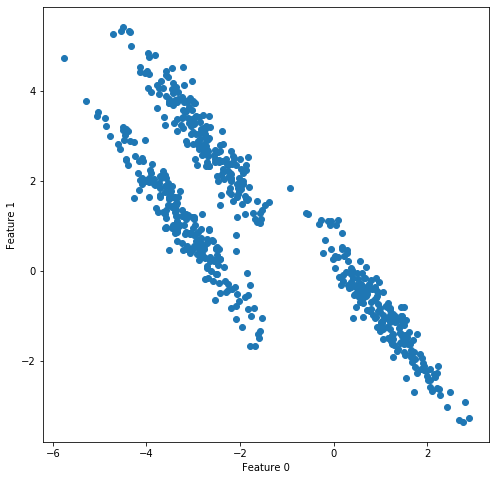

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# generamos nuestro dataset
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
transformation = rng.normal(size=(2, 2)) # para "estirar" los datos
X = np.dot(X, transformation)

# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

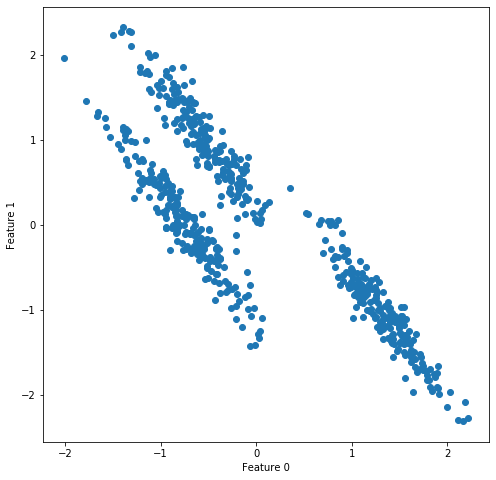

In [79]:
# plot
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [0]:
Z = linkage(X_scaled, method='average', metric='mahalanobis')

In [100]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist calcula las distancias entre elementos de nuestro dataset usando la 
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z, pdist(X_scaled))
c

0.5967391783419715

In [101]:
Z[0]

array([3.94000000e+02, 5.16000000e+02, 2.54744816e-03, 2.00000000e+00])

In [103]:
Z[:40]

array([[3.94000000e+02, 5.16000000e+02, 2.54744816e-03, 2.00000000e+00],
       [2.40000000e+01, 4.89000000e+02, 3.33033367e-03, 2.00000000e+00],
       [2.19000000e+02, 5.29000000e+02, 5.16418024e-03, 2.00000000e+00],
       [1.30000000e+02, 4.75000000e+02, 6.19528884e-03, 2.00000000e+00],
       [2.05000000e+02, 3.05000000e+02, 6.70848443e-03, 2.00000000e+00],
       [9.10000000e+01, 1.20000000e+02, 7.64727694e-03, 2.00000000e+00],
       [9.80000000e+01, 5.14000000e+02, 7.67968652e-03, 2.00000000e+00],
       [4.10000000e+01, 3.85000000e+02, 8.70331334e-03, 2.00000000e+00],
       [1.07000000e+02, 1.35000000e+02, 8.81929516e-03, 2.00000000e+00],
       [1.82000000e+02, 5.70000000e+02, 9.43358249e-03, 2.00000000e+00],
       [1.46000000e+02, 3.70000000e+02, 9.87797939e-03, 2.00000000e+00],
       [5.10000000e+02, 5.80000000e+02, 1.00405716e-02, 2.00000000e+00],
       [1.06000000e+02, 3.60000000e+02, 1.03365739e-02, 2.00000000e+00],
       [3.45000000e+02, 3.49000000e+02, 1.13868633e

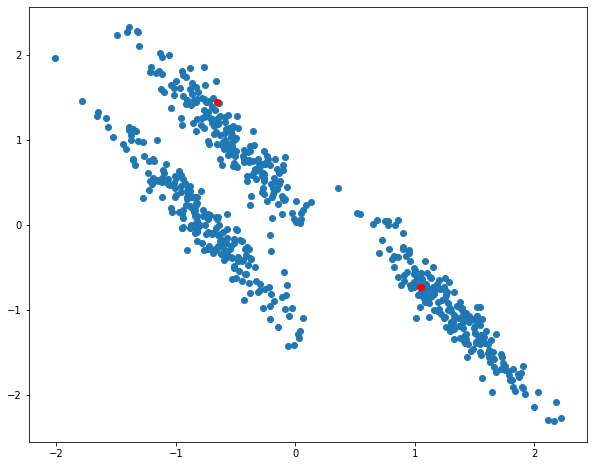

[[ 1.04742116 -0.73226154]
 [ 1.0468281  -0.73603753]
 [-0.6581021   1.45073739]]


In [104]:
idxs = [91, 120, 210]
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[:,0], X_scaled[:,1])  # plot all points
plt.scatter(X_scaled[idxs,0], X_scaled[idxs,1], c='r')  # plot interesting points in red again
plt.show()

print(X_scaled[idxs])

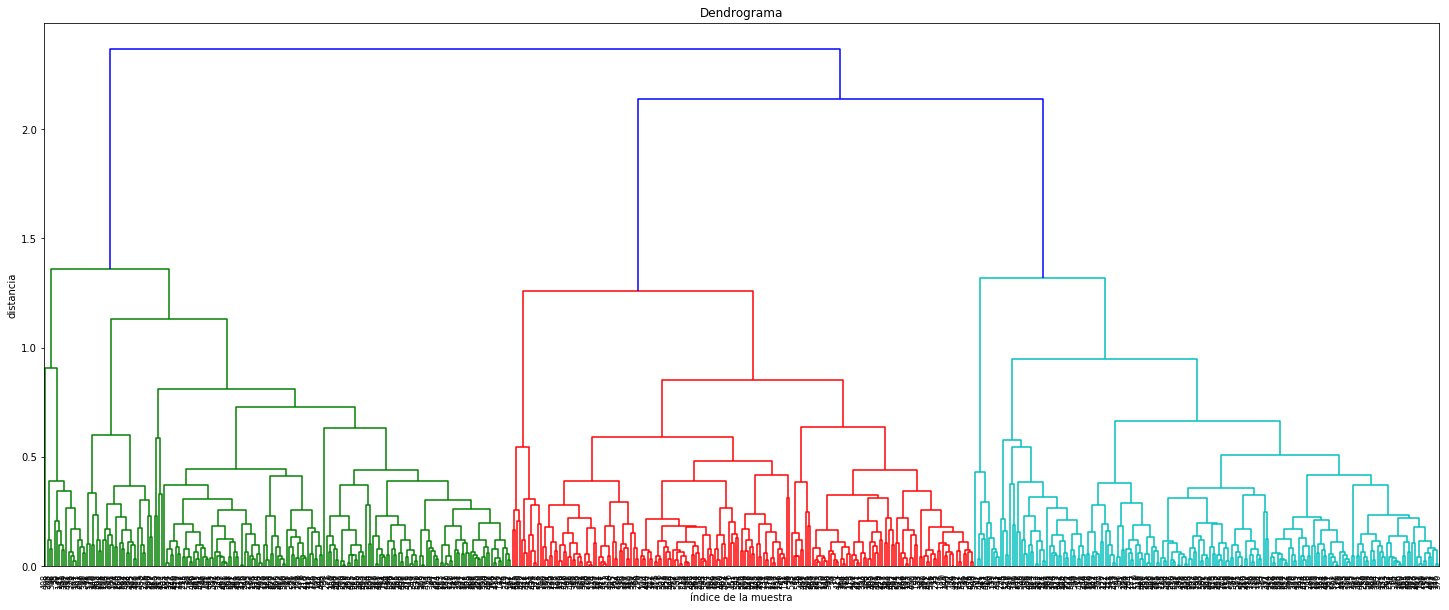

In [105]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

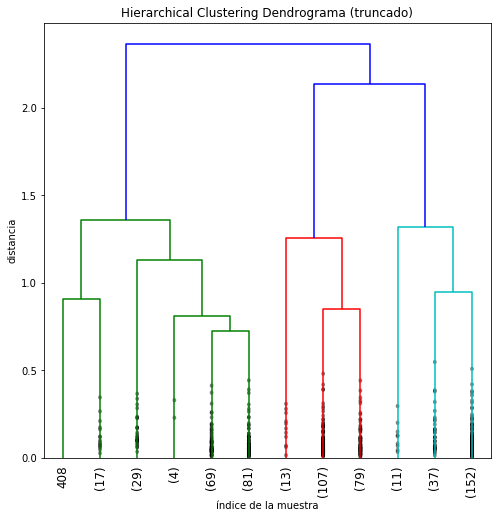

In [106]:
# quedarnos con las últimas p uniones
plt.title('Hierarchical Clustering Dendrograma (truncado)')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar solo las últimas p uniones
    p=12,  # definimos p
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [0]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

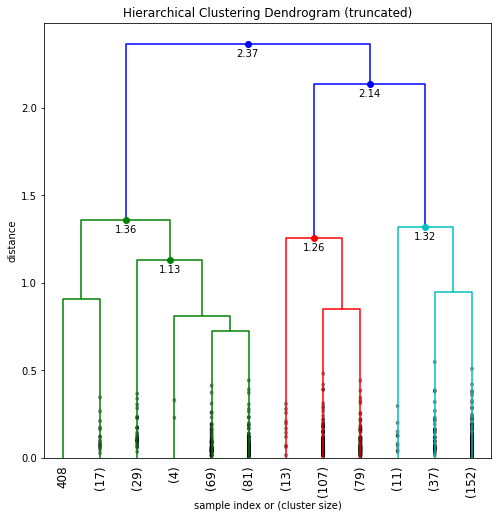

In [108]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,  # useful in small plots so annotations don't overlap
)
plt.show()

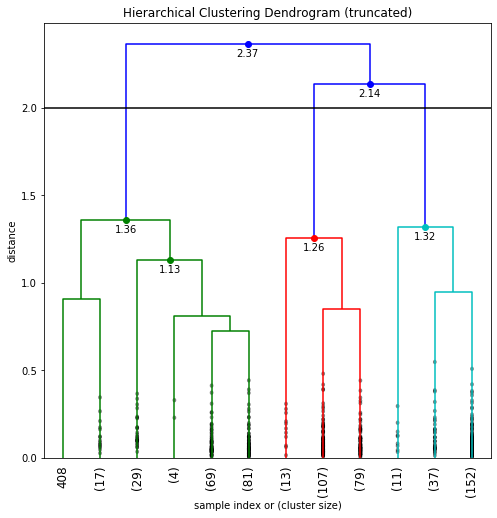

In [110]:
d_max = 2


fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,
    max_d=d_max,  # plot a horizontal cut-off line
)
plt.show()

In [112]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='mahalanobis', linkage='average')
clusters = cluster.fit_predict(X_scaled)
print(clusters)

[2 2 0 2 2 2 0 2 0 1 2 2 0 2 1 2 1 0 2 1 0 2 1 0 2 2 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 1 2 2 2 0 1 2 2 0 2 2 0 1 0 0 2 1 2 2 1 2 1 1 1 2 2 1 0 1 2 2 1
 0 1 2 2 0 1 2 1 1 2 0 2 1 0 0 1 1 1 0 1 2 2 2 1 2 0 2 2 0 0 0 1 1 2 1 1 1
 1 2 0 1 1 1 2 1 0 1 0 1 1 1 2 0 1 0 1 0 1 1 1 2 2 1 2 0 2 1 0 2 0 2 2 1 0
 0 2 0 2 1 2 1 1 0 2 2 0 2 2 2 2 2 0 1 1 2 0 2 1 0 2 0 1 2 1 2 1 0 2 0 1 0
 1 2 2 2 1 0 0 2 0 0 1 1 2 0 2 0 0 2 0 1 0 2 2 0 1 2 2 2 1 2 1 0 2 0 0 2 1
 0 1 1 0 2 0 2 0 0 1 1 0 1 0 1 2 0 2 0 1 2 2 2 0 0 0 0 1 1 1 1 0 0 0 1 0 1
 2 2 0 1 0 2 0 2 0 0 2 2 1 2 1 2 2 0 2 2 2 1 1 2 1 2 1 1 0 1 0 2 0 0 1 1 0
 1 1 0 0 0 2 2 1 2 0 0 1 2 1 2 2 2 0 1 2 1 0 1 0 0 0 2 1 1 0 0 0 1 2 2 0 1
 1 1 2 1 0 1 1 0 0 1 2 0 0 2 1 1 0 2 2 1 2 1 1 0 2 2 1 1 1 0 2 1 1 1 1 0 0
 1 0 2 1 1 1 2 0 2 2 2 0 2 2 1 1 0 0 0 2 0 2 0 2 1 2 2 1 1 0 2 1 0 0 2 0 1
 1 0 2 0 1 1 2 1 2 1 0 2 2 1 2 2 1 1 0 0 2 1 2 0 0 1 0 0 0 0 1 0 2 2 0 2 2
 1 1 2 0 1 2 0 2 0 0 2 1 1 0 0 2 2 2 1 1 2 2 2 0 0 2 0 2 2 1 0 0 1 2 1 0 1
 1 2 1 2 0 0 1 0 2 0 0 1 

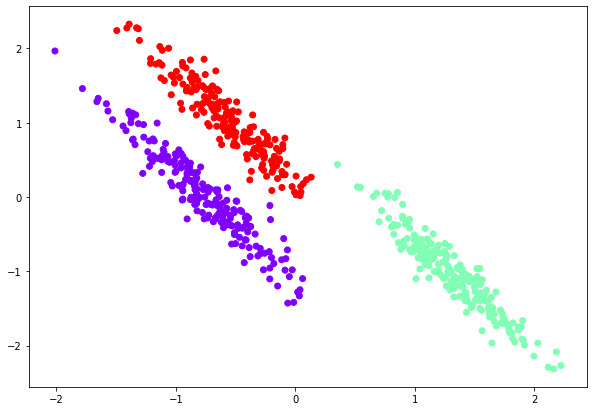

In [113]:
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=cluster.labels_, cmap='rainbow')

## **A continuación se presenta el método de Clustering Jerárquico mejorado en parámetro distancia**

In [0]:
Z1 = linkage(X_scaled, method='average', metric='euclidean')

In [115]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist calcula las distancias entre elementos de nuestro dataset usando la 
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z1, pdist(X_scaled))
c

0.8036466645658787

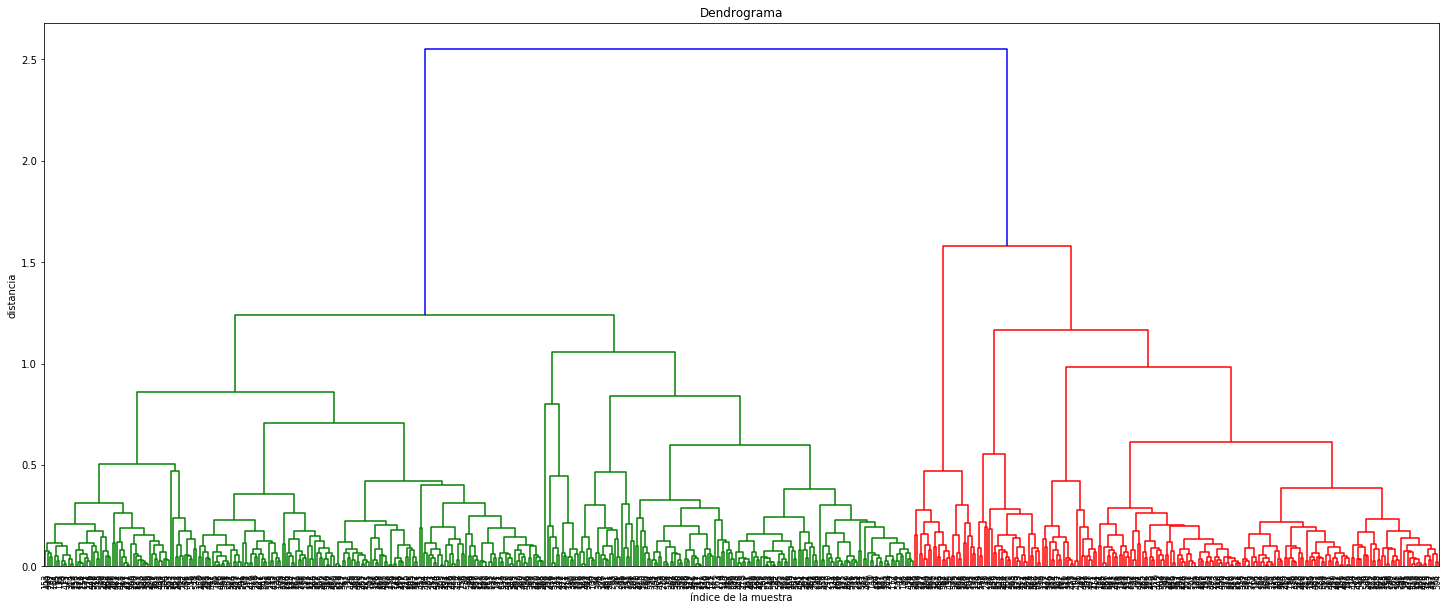

In [116]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Dendrograma')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z1,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

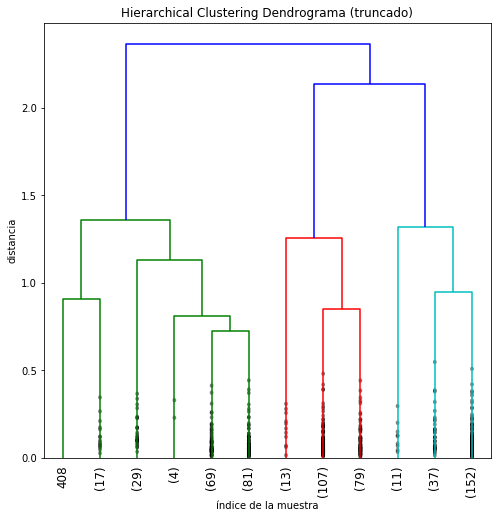

In [117]:
# quedarnos con las últimas p uniones
plt.title('Hierarchical Clustering Dendrograma (truncado)')
plt.xlabel('índice de la muestra')
plt.ylabel('distancia')
dendrogram(
    Z,
    truncate_mode='lastp',  # mostrar solo las últimas p uniones
    p=12,  # definimos p
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

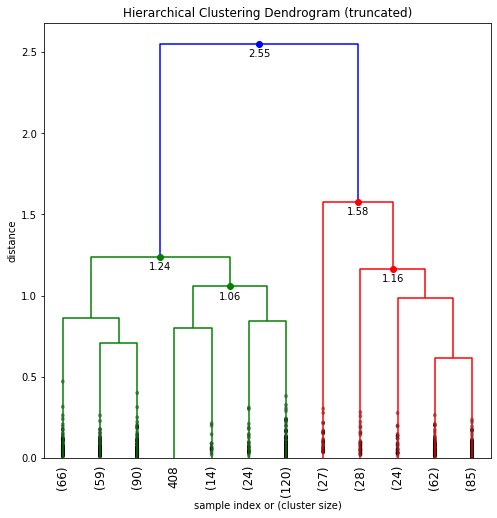

In [119]:
fancy_dendrogram(
    Z1,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,  # useful in small plots so annotations don't overlap
)
plt.show()

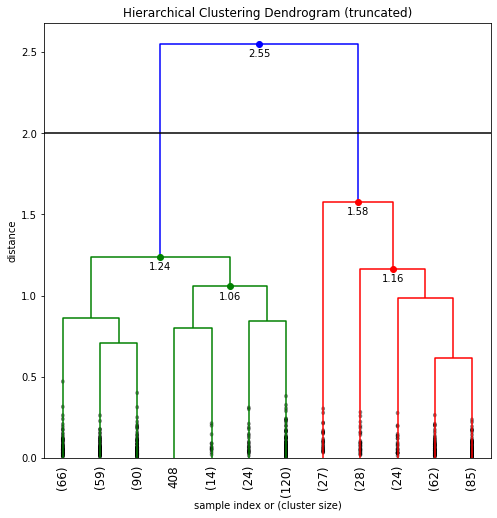

In [120]:
d_max = 2


fancy_dendrogram(
    Z1,
    truncate_mode='lastp',
    p=12,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=1,
    max_d=d_max,  # plot a horizontal cut-off line
)
plt.show()

In [123]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
clusters = cluster.fit_predict(X_scaled)
print(clusters)

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0
 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0
 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1
 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1
 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0
 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0
 0 1 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1
 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0
 0 1 0 1 1 0 0 1 1 1 1 0 

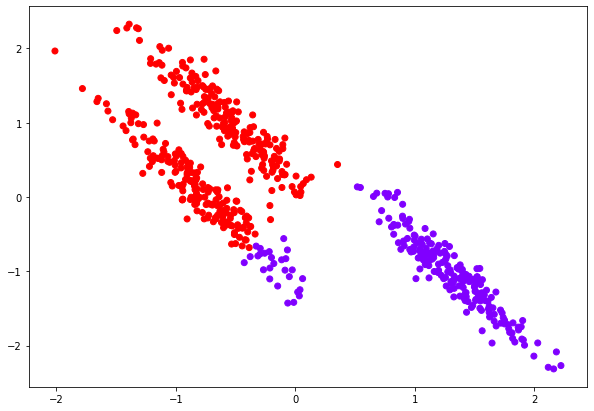

In [124]:
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=cluster.labels_, cmap='rainbow')